In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# inter = "PF"
case = "3-bus"
# hyperloop_name = "RTS24_AC_12w_dummy_0.3_v0.4_PF_LB_0_40"
# hyperloop_name = "3-bus_AC_12w_dummy_0.3_v0.4_PF_LCOE_0_10"
# hyperloop_name = f"{case}_AC_12w_dummy_0.3_v0.4_PF_LCOE_0_37"
# hyperloop_name = "test_loss_rand_hours_3-bus_DC_0.3_v0.3_PF_0_20"
# hyperloop_name = "rand_Hours_3-bus_DC_0.25_v0.33_PF_0_20"
# hyperloop_name = "rand_Weeks_3-bus_DC_0.25_v0.33_PF_0_20"
#hyperloop_name = "test_norm_meth_rand_Days_3-bus_DC_0.25_v0.33_PF_0_20_extra"
hyperloop_name = "Decay_rand_Weeks_3-bus_DC_0.25_v0.33_PF_0_20"

cluster_run = False
results = pd.read_csv(f"Loss_results_csv/{hyperloop_name}.csv")
# results_2 = pd.read_csv(f"Loss_results_csv/{hyperloop_name_2}.csv")
# results = pd.concat([results,results_2],axis=0)

In [3]:
results.columns

Index(['Unnamed: 0', 'Model_type', 'Dor', 'Relu_out', 'Batch_size', 'Lr',
       'Lri', 'Lrs', 'Lrg', 'Epochs', 'Min_val', 'Nb_hours_used', 'Sel_method',
       'Norm_method', 'Tr_l', 'Te_l', 'V_l', 'Tr_l_mse', 'Te_l_mse', 'V_l_mse',
       'Tr_l_mae', 'Te_l_mae', 'Te_l_mae_man', 'V_l_mae', 'fy_l', 'fy_l_mse',
       'fy_l_mae', 'fy_l_mae_man', 'Train_time', 'Eval_time', 'alpha', 'beta',
       'MAE', 'Test size', 'Val size'],
      dtype='object')

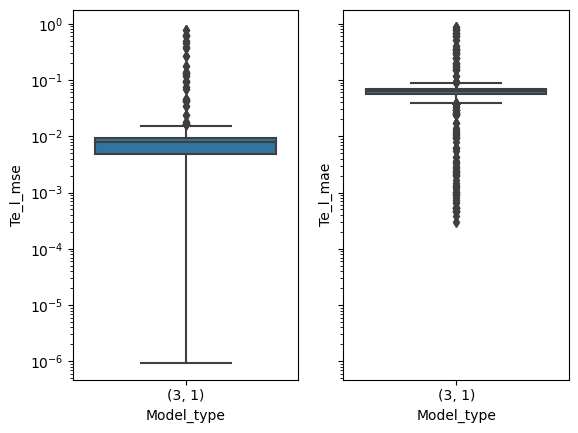

In [4]:
fig, axs = plt.subplots(1,2,sharey =True)

sns.boxplot(y = "Te_l_mse",x="Model_type",data = results,ax=axs[0])
axs[0].set_yscale("log")
sns.boxplot(y = "Te_l_mae",x="Model_type",data = results,ax=axs[1])
axs[1].set_yscale("log")
#plt.savefig(f"Figures/Hyperparams/{case}_Test_loss_ModelType")

In [6]:
#Next we add a filter, for the test_loss to be smaller than 0.001#
f = (results.Te_l_mse <=100000)

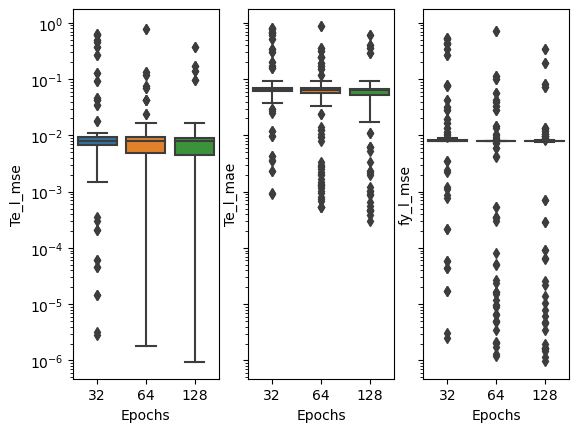

In [7]:
fig, axs = plt.subplots(1,3,sharey =True)

w=2.5
x="Epochs"

sns.boxplot(y = "Te_l_mse",x=x,data = results[f],ax = axs[0],whis=w)
axs[0].set_yscale("log")
sns.boxplot(y = "Te_l_mae",x=x,data = results[f],ax=axs[1],whis=w)
axs[1].set_yscale("log")
sns.boxplot(y = "fy_l_mse",x=x,data = results[f],ax=axs[2],whis=w)
axs[2].set_yscale("log")
#plt.savefig(f"Figures/Hyperparams/{case}_Test_loss_{x}")

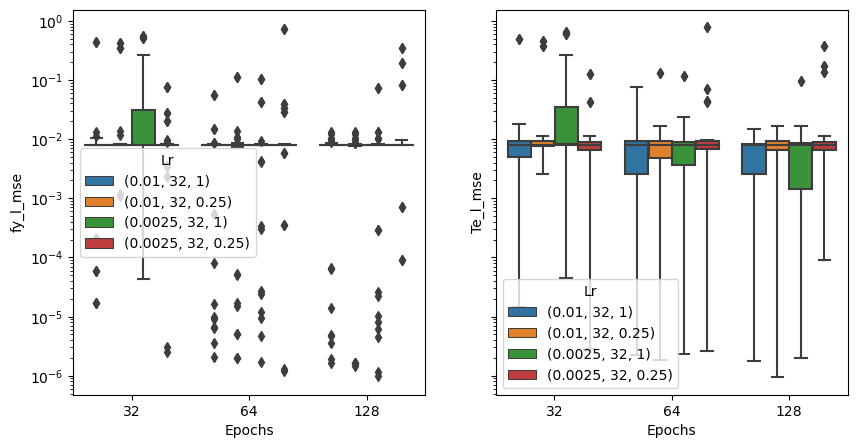

In [9]:
fig, axs = plt.subplots(1,2,sharey =True,figsize = (10,5))

w=10
x="Epochs"
h = "Lr"
sns.boxplot(y = "fy_l_mse",x=x,data = results[f],ax = axs[0],whis=w,hue=h)
axs[0].set_yscale("log")
sns.boxplot(y = "Te_l_mse",x=x,data = results[f],ax=axs[1],whis=w,hue=h)
axs[1].set_yscale("log")
#plt.savefig(f"Figures/Hyperparams/{case}_Test_loss_{x}_by_{h}")

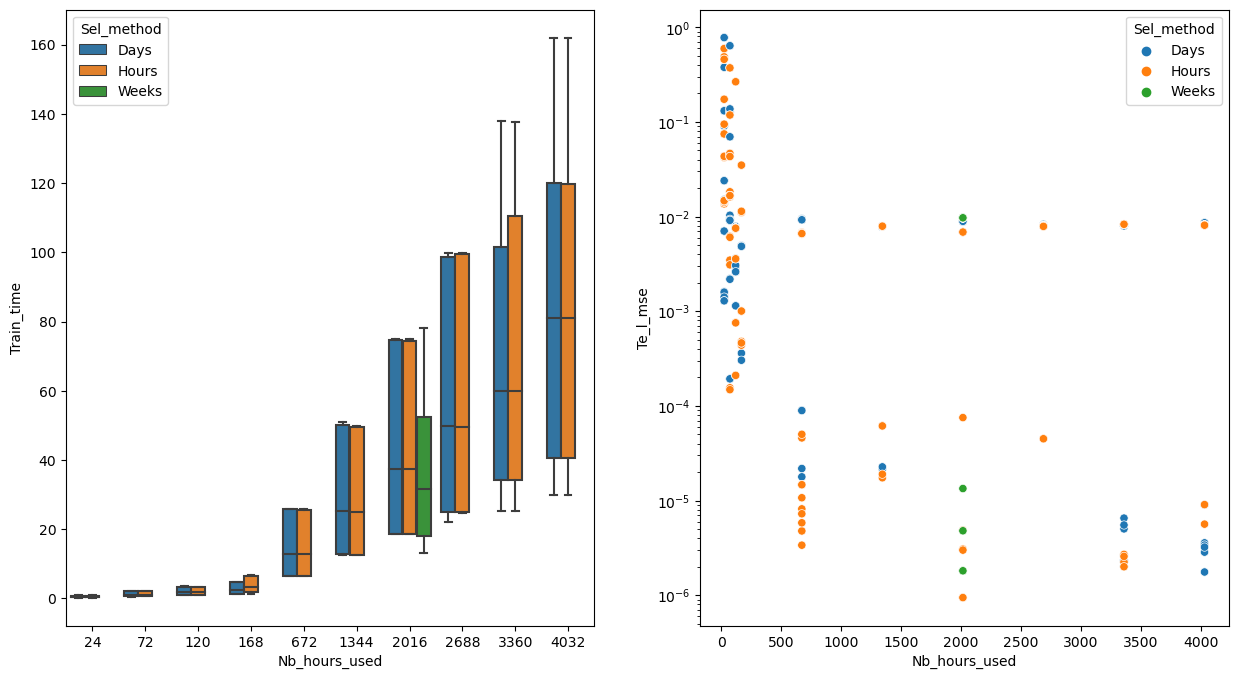

In [31]:
fig, axs = plt.subplots(1, 2, sharey=False, figsize=(15, 8))
f = results.Nb_hours_used >1
#f = results.Lri == 0.01
x = "Nb_hours_used"
h = "Sel_method"

y1 = "Train_time"
y2 = "Te_l_mse"
# First subplot with a linear y-axis
sns.boxplot(y=y1, x=x, data=results[f],hue = h, ax=axs[0])

# Second subplot with a logarithmic y-axis
sns.scatterplot(y=y2, x=x, data=results[f],hue=h, ax=axs[1])
axs[1].set_yscale("log")  # Keep this line for the second subplot
# sns.boxplot(y="fy_l_mse", x=x, data=results[f],hue=h, ax=axs[2])
# axs[2].set_yscale("log")  # Keep this line for the second subplot

# # Second subplot with a logarithmic y-axis
# sns.boxplot(y="fy_l_mae", x=x, data=results[f],hue=h, ax=axs[2])
# axs[2].set_yscale("log")  # Keep this line for the second subplot
plt.savefig(f"Figures/Hyperparams/Number_hours_analysis/{case}_{y1}_and_{y2}_{x}_{h}")

<Axes: xlabel='Min_val', ylabel='V_l'>

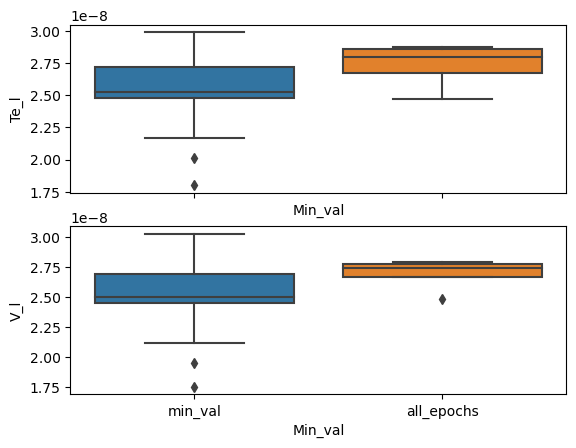

In [25]:
fig, axs = plt.subplots(2,1,sharex =True)
sns.boxplot(y = "Te_l",x="Min_val",data = results[f],ax = axs[0])
sns.boxplot(y = "V_l",x="Min_val",data = results[f],ax = axs[1])

<Axes: xlabel='Epochs', ylabel='V_l'>

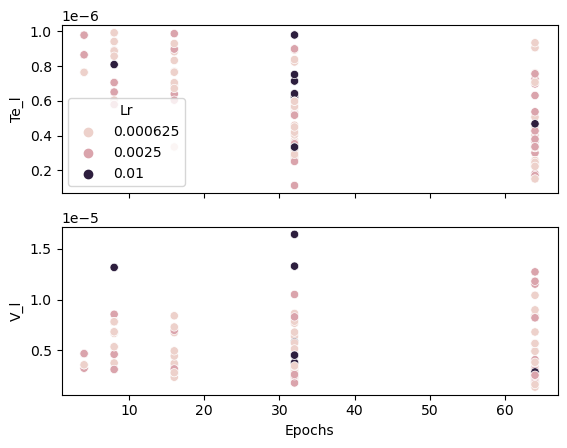

In [16]:
f = (results.Te_l <=1e-6)
fig, axs = plt.subplots(2,1,sharex =True)
sns.scatterplot(y = "Te_l",x="Epochs",data = results[f],ax = axs[0],hue = "Lr")
sns.scatterplot(y = "V_l",x="Epochs",data = results[f],ax = axs[1],hue = "Lr",legend = False)

<Axes: xlabel='Epochs', ylabel='V_l'>

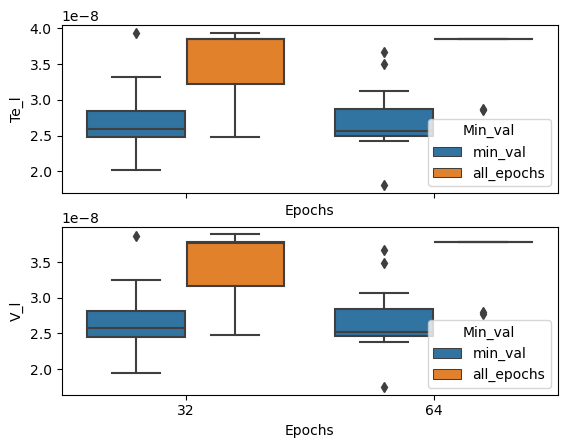

In [29]:
f = (results.Te_l <=4e-8)
fig, axs = plt.subplots(2,1,sharex =True)
sns.boxplot(y = "Te_l",x="Epochs",data = results[f],ax = axs[0],hue = "Min_val")
sns.boxplot(y = "V_l",x="Epochs",data = results[f],ax = axs[1],hue = "Min_val")

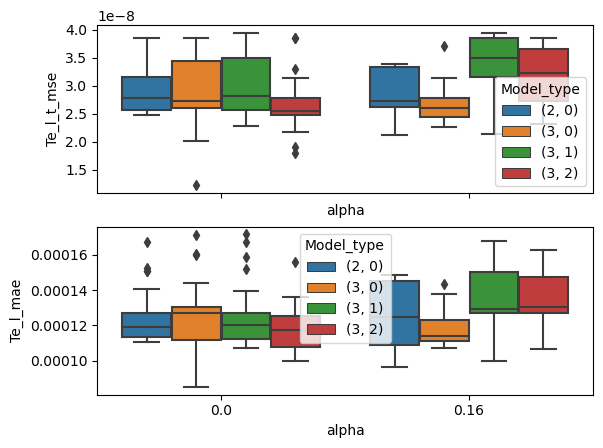

In [31]:
f = (results.Te_l_t_mse <=4e-8)
fig, axs = plt.subplots(2,1,sharex =True)
sns.boxplot(y = "Te_l_t_mse",x="alpha",data = results[f],ax = axs[0],hue = "Model_type")
sns.boxplot(y = "Te_l_mae",x="alpha",data = results[f],ax = axs[1],hue = "Model_type")
plt.savefig("Figures/dummy_il/Lr_effect_Testloss_falpha.png")

<Axes: xlabel='alpha', ylabel='Te_l_mae'>

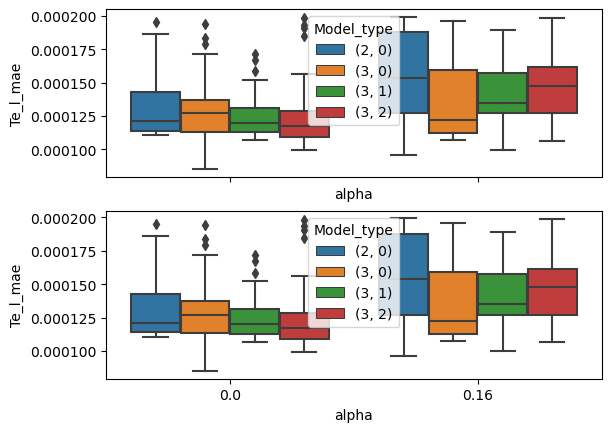

In [43]:
f = (results.Te_l_mae <=2e-4)
fig, axs = plt.subplots(2,1,sharex =True)
sns.boxplot(y = "Te_l_mae",x="alpha",data = results[f],ax = axs[0],hue = "Model_type")
sns.boxplot(y = "Te_l_mae",x="alpha",data = results[f],ax = axs[1],hue = "Model_type")

<Axes: xlabel='Batch_size', ylabel='Te_l_t_mse'>

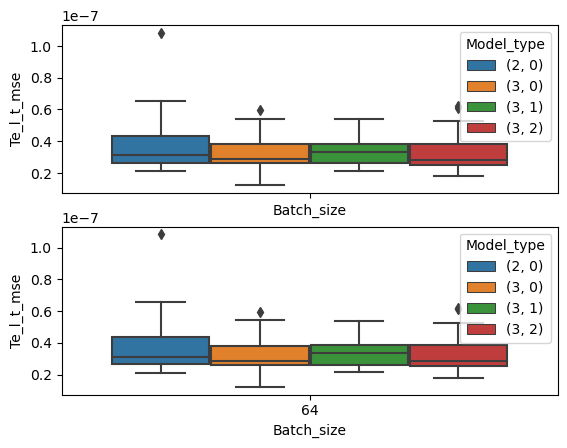

In [41]:
f = (results.Te_l_mae <=2e-4)
fig, axs = plt.subplots(2,1,sharex =True)
sns.boxplot(y = "Te_l_t_mse",x="Batch_size",data = results[f],ax = axs[0],hue = "Model_type")
sns.boxplot(y = "Te_l_t_mse",x="Batch_size",data = results[f],ax = axs[1],hue = "Model_type")


<Axes: xlabel='Relu_out', ylabel='Te_l_mae'>

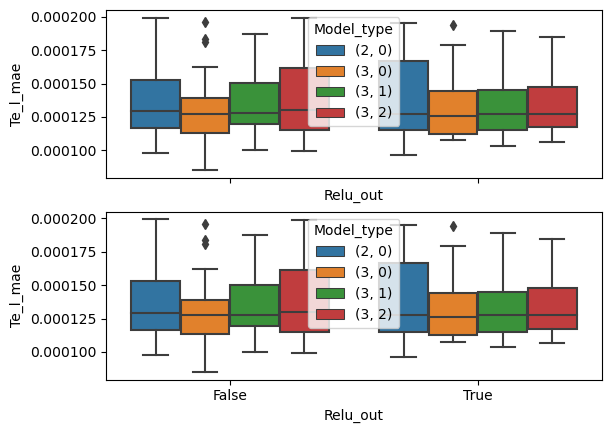

In [47]:
f = (results.Te_l_mae <=2e-4)
fig, axs = plt.subplots(2,1,sharex =True)
sns.boxplot(y = "Te_l_mae",x="Relu_out",data = results[f],ax = axs[0],hue = "Model_type")
sns.boxplot(y = "Te_l_mae",x="Relu_out",data = results[f],ax = axs[1],hue = "Model_type")

<Axes: xlabel='Relu_out', ylabel='Te_l_t_mse'>

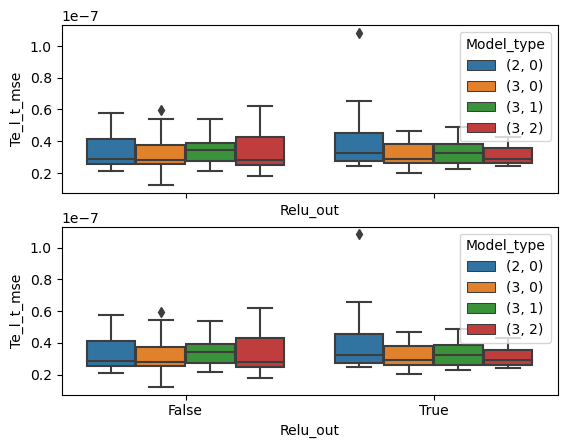

In [48]:
f = (results.Te_l_mae <=2e-4)
fig, axs = plt.subplots(2,1,sharex =True)
sns.boxplot(y = "Te_l_t_mse",x="Relu_out",data = results[f],ax = axs[0],hue = "Model_type")
sns.boxplot(y = "Te_l_t_mse",x="Relu_out",data = results[f],ax = axs[1],hue = "Model_type")